## Importamos las librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models, optimizers
import warnings
warnings.filterwarnings('ignore')

## Cargamos el dataset

In [ ]:
data = '/content/dataset_min_bater.csv'
df = pd.read_csv(data)
df.shape

(19, 2)

In [ ]:
dataset = df.values
dataset

array([[ 0,  5],
       [ 4,  1],
       [ 8, 14],
       [12, 19],
       [16, 24],
       [20, 28],
       [24, 33],
       [28, 38],
       [32, 42],
       [36, 47],
       [40, 52],
       [44, 56],
       [48, 61],
       [52, 66],
       [57, 73],
       [62,  8],
       [66, 86],
       [71, 93],
       [75,  1]])

## Creando el set de entrenamiento

In [ ]:
X = dataset[:,0]
y = dataset[:,-1]

array([ 5, 10, 14, 19, 24, 28, 33, 38, 42, 47, 52, 56, 61])

## Creando el modelo

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

## Compilamos el modelo

In [ ]:
model.compile(optimizer='adam',  
              loss='mse', 
              metrics=['mae'])

## Entrenamos el modelo

In [ ]:
model.fit(X, y, epochs=94, batch_size=16)

Epoch 1/94
1/1 [==============================] - 1s 530ms/step - loss: 1304.1484 - mae: 31.9706
Epoch 2/94
1/1 [==============================] - 0s 8ms/step - loss: 1247.6401 - mae: 31.2957
Epoch 3/94
1/1 [==============================] - 0s 11ms/step - loss: 1192.5051 - mae: 30.6222
Epoch 4/94
1/1 [==============================] - 0s 13ms/step - loss: 1140.4454 - mae: 29.9718
Epoch 5/94
1/1 [==============================] - 0s 9ms/step - loss: 1089.9534 - mae: 29.3264
Epoch 6/94
1/1 [==============================] - 0s 8ms/step - loss: 1040.4401 - mae: 28.6788
Epoch 7/94
1/1 [==============================] - 0s 8ms/step - loss: 991.9257 - mae: 28.0289
Epoch 8/94
1/1 [==============================] - 0s 9ms/step - loss: 944.4271 - mae: 27.3770
Epoch 9/94
1/1 [==============================] - 0s 8ms/step - loss: 897.9589 - mae: 26.7230
Epoch 10/94
1/1 [==============================] - 0s 10ms/step - loss: 852.5331 - mae: 26.0670
Epoch 11/94
1/1 [==============================]

In [ ]:
model.predict([48])

array([[62.30282]], dtype=float32)

## Evaluamos y graficamos 

In [ ]:
model.evaluate(X, y)

1/1 [==============================] - 0s 110ms/step - loss: 5.9212 - mae: 1.9644


[5.921207904815674, 1.9643933773040771]

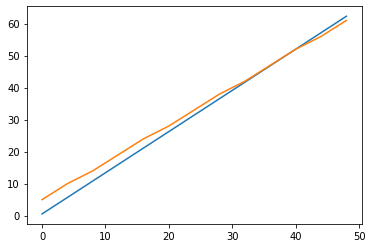

In [ ]:
plt.plot(X, model.predict(X), X,y)

Después de esta primera evaluación, se encontró que se puede mejorar el modelo con ciertos ajustes, que se verán a continuación.

# Aplicando regularización

In [ ]:
from keras.layers import Dropout 
from keras import regularizers

### Modelo 2

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01), input_shape=(1,)))
Dropout(0.5)
model2.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
Dropout(0.5)
model2.add(layers.Dense(1))

### Compilando el modelo 2

In [ ]:
model2.compile(optimizer='adam',  
              loss='mse', 
              metrics=['mae'])

### Entrenando el modelo 2

In [ ]:
model2.fit(X, y, epochs=220, batch_size=16)

Epoch 1/220
1/1 [==============================] - 0s 11ms/step - loss: 0.3407 - mae: 0.1948
Epoch 2/220
1/1 [==============================] - 0s 8ms/step - loss: 0.3398 - mae: 0.1937
Epoch 3/220
1/1 [==============================] - 0s 8ms/step - loss: 0.3397 - mae: 0.1933
Epoch 4/220
1/1 [==============================] - 0s 8ms/step - loss: 0.3402 - mae: 0.1934
Epoch 5/220
1/1 [==============================] - 0s 7ms/step - loss: 0.3408 - mae: 0.2008
Epoch 6/220
1/1 [==============================] - 0s 11ms/step - loss: 0.3409 - mae: 0.1954
Epoch 7/220
1/1 [==============================] - 0s 7ms/step - loss: 0.3406 - mae: 0.2008
Epoch 8/220
1/1 [==============================] - 0s 11ms/step - loss: 0.3399 - mae: 0.1930
Epoch 9/220
1/1 [==============================] - 0s 7ms/step - loss: 0.3392 - mae: 0.1932
Epoch 10/220
1/1 [==============================] - 0s 7ms/step - loss: 0.3390 - mae: 0.1919
Epoch 11/220
1/1 [==============================] - 0s 10ms/step - loss: 0.3

### Predicción, evaluación y grafico del modelo 2

In [ ]:
muestra_minutos = 10 
prediccion = model2.predict([muestra_minutos])
prediccion

array([[16.608183]], dtype=float32)

In [ ]:
model2.predict([48])

array([[61.002087]], dtype=float32)

In [ ]:
model2.evaluate(X,y)

1/1 [==============================] - 0s 183ms/step - loss: 0.3217 - mae: 0.1893


[0.32166892290115356, 0.18929345905780792]

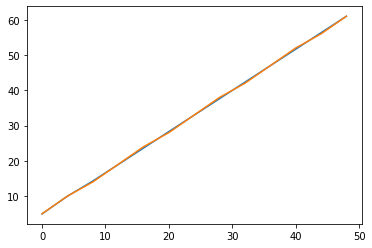

In [ ]:
plt.plot(X, model2.predict(X), X,y)

In [ ]:
target_dir = './modelo/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
cnn.save('./modelo/modelo.h5')
cnn.save_weights('./modelo/pesos.h5')

Conclusión: éste modelo de red neuronal, predice con bastante excatitud los minutos que tarda en cargarse la bateria de un celular; tomando como ejemplo la muestra de minutos, de manera aleatorios.